In [1]:
import sys

# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "/ai2es/")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cocpit
from ai2es import rain_gauge_classification_report as rain_gauge_classification_report


import seaborn as sns
import matplotlib.pyplot as plt

plt_params = {
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
    "legend.title_fontsize": 14,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)
sns.set_style("whitegrid")
%load_ext autoreload
%autoreload 2

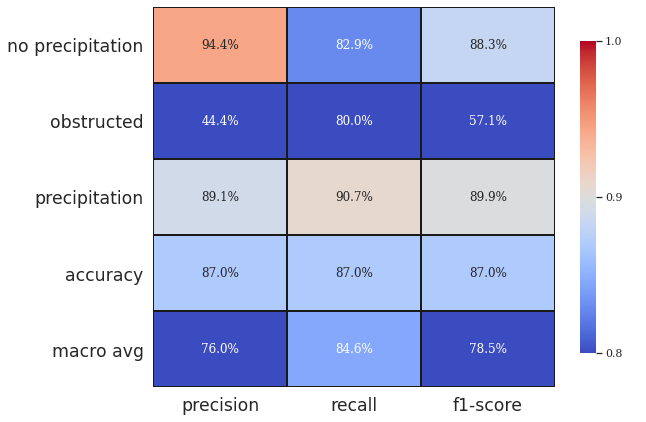

In [82]:
clf_report = pd.read_csv(
    "/ai2es/saved_accuracies/v0.0.0/clf_report_placeholder.csv",
    index_col=0,
).drop(columns=["model", "fold"])
save_name = "/ai2es/plots/weighted_classification_report_rain_gauge_2class.png"


cocpit.plotting_scripts.classification_report.classification_report_classes(
    clf_report, save_name=save_name, save_fig=False
)  

In [2]:
df = rain_gauge_classification_report.main(root_dir = '/ai2es/saved_accuracies/v0.0.0/')

In [3]:
df

,Labeling Strategy,Precision,Recall,F1-score,kfold,Model Architecture
0,2 class human,0.905209,0.90,0.899269,0,resnet18
1,2 class human,0.914706,0.90,0.897211,0,resnet34
2,2 class human,0.775516,0.73,0.724288,0,resnet152
3,2 class human,0.961044,0.96,0.960131,0,efficient
4,2 class human,0.734545,0.72,0.720000,0,alexnet
5,2 class human,0.980690,0.98,0.979943,0,vgg16
6,2 class human,0.897705,0.87,0.868467,0,vgg19
7,2 class human,0.888374,0.88,0.878214,0,densenet169
8,2 class human,0.950121,0.95,0.949965,0,densenet201
0,3 class human,0.749206,0.63,0.632015,0,resnet18


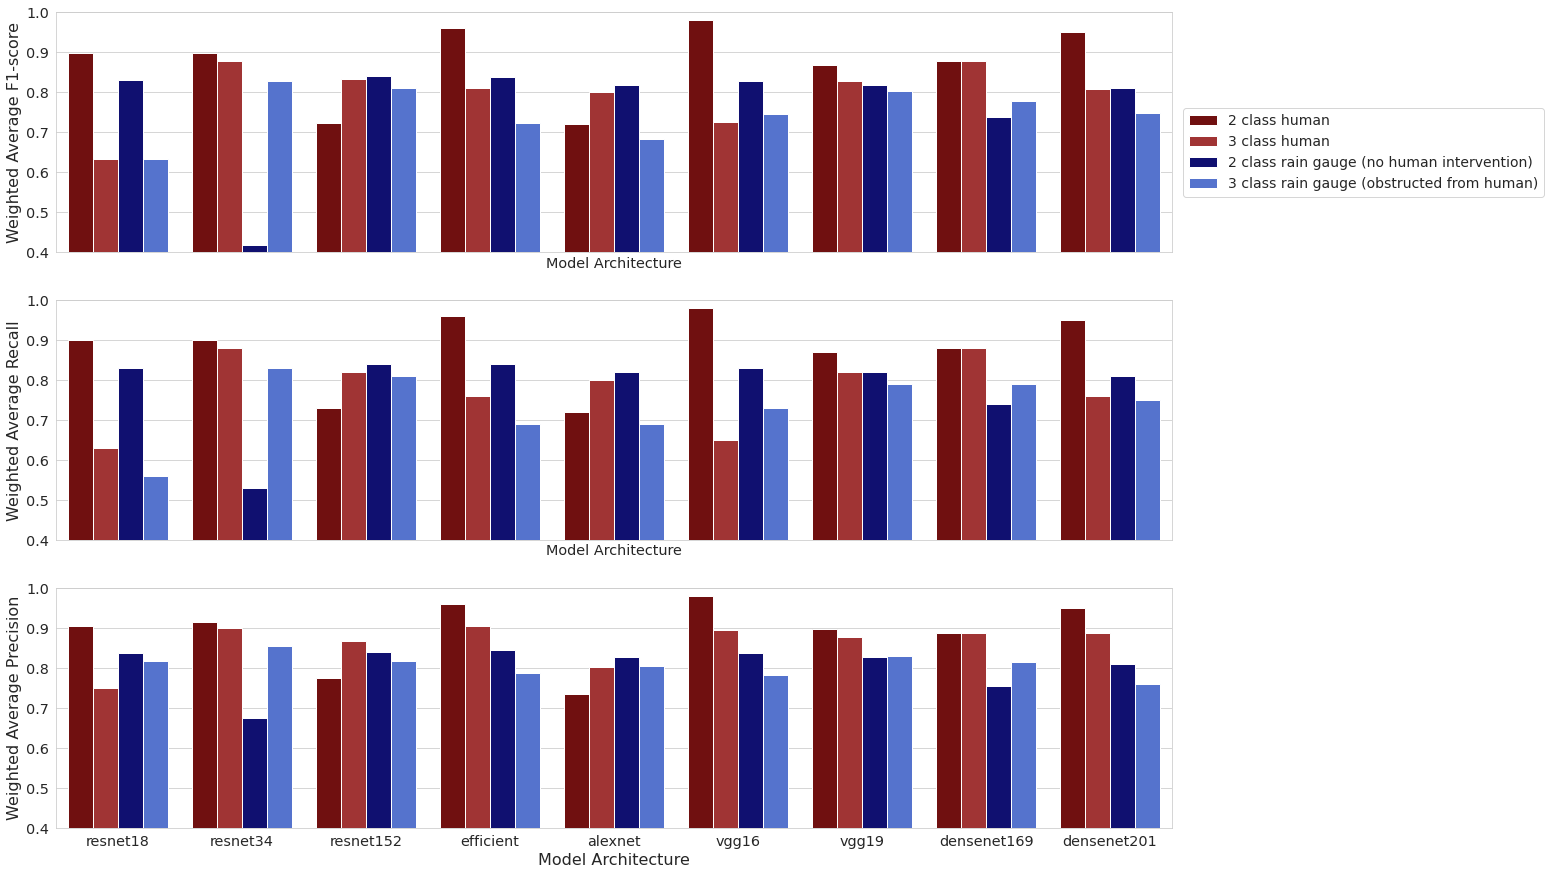

In [8]:
fig, axs = plt.subplots (3, 1, figsize=(20, 15), sharex='col')
y_vars = ['F1-score', 'Recall', 'Precision']
labels = ['Weighted Average F1-score', 'Weighted Average Recall', 'Weighted Average Precision']
for (ax, y_var, label) in zip(axs, y_vars, labels):
    g = sns.barplot(x = "Model Architecture",      
                y = y_var,     
                hue = "Labeling Strategy",  
                data = df,   
                palette=['maroon', 'firebrick', 'navy', 'royalblue'],
                ax=ax
                )
    g.set(ylim=(0.4, 1.0))
    g.set_ylabel(label,fontsize=16)
    g.legend([],[], frameon=False)
g.set_xlabel('Model Architecture',fontsize=16)
plt.legend(bbox_to_anchor=(1.01, 3.0), loc='upper left', borderaxespad=0, fontsize=14)
